## E.coli 1st strategy model analysis 

In [1]:
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd

The history saving thread hit an unexpected error (OperationalError('no such table: history')).History will not be written to the database.


In [2]:
# Importing model
model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')

## General check of model

**Checking max 5-HTP production and respective growth rate if objective value is changed to the 5-HTP export reaction**

In [22]:
# Finding the flux of the phhA reaction
with model:
    print(model.reactions.phhA)
    model.objective = model.reactions.phhA
    solution = model.optimize()
    max_5HTP_production = solution.objective_value
    print("HTP flux", max_5HTP_production)
    print("Biomass flux", solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)

phhA: o2_c + thmnp_c + trp__L_c --> hthpth_c + htrp_c
HTP flux 4.2792043399638375
Biomass flux 0.0


It was observed that when the optimal flux goes towards 5-HTP production, then there will be no flux towards biomass production, thus no growth of the cell.

## Observing changes in growth rate with increasing 5-HTP export flux

In [149]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [150]:
ppp_5HTP = production_envelope(model,
                    reactions=[model.reactions.phhA],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)

In [151]:
ppp_5HTP

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,phhA
0,EX_glc__D_e,0.0,0.0,NaN,0.876997,1.161751e+01,NaN,0.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.831248,1.101147e+01,NaN,0.225221
2,EX_glc__D_e,0.0,0.0,NaN,0.785499,1.040543e+01,NaN,0.450443
3,EX_glc__D_e,0.0,0.0,NaN,0.739749,9.799397e+00,NaN,0.675664
4,EX_glc__D_e,0.0,0.0,NaN,0.694000,9.193359e+00,NaN,0.900885
5,EX_glc__D_e,0.0,0.0,NaN,0.647766,8.580901e+00,NaN,1.126106
6,EX_glc__D_e,0.0,0.0,NaN,0.601497,7.967979e+00,NaN,1.351328
7,EX_glc__D_e,0.0,0.0,NaN,0.555228,7.355058e+00,NaN,1.576549
8,EX_glc__D_e,0.0,0.0,NaN,0.508959,6.742136e+00,NaN,1.801770
9,EX_glc__D_e,0.0,0.0,NaN,0.462690,6.129215e+00,NaN,2.026992


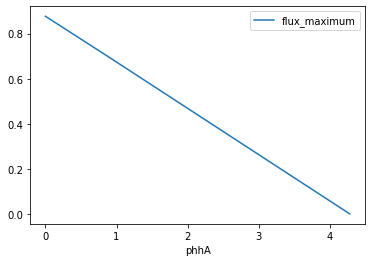

In [152]:
ppp_5HTP.plot(x='phhA', y='flux_maximum')

No satisfying results, the correlation between the biomass growth and max 5-HTP production is strongly negative.

## Knocking out a single gene and setting the objective value of the model for 5-HTP export flux

Only non-zero biomass production flux knock-outs are selected

In [153]:
for gene in model.genes:
    with model:
        gene.knock_out()
        model.objective = model.reactions.phhA
        solution = model.optimize()
        if solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M > 0:
            print ('5-HTP export flux:', solution.fluxes.tph, 'Gene ID:', gene.id, 'Biomass production:', solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)

No solutions displayed, no single knock-outs and optmization to maximum 5-HTP production yields positive growth rate

Only non-zero 5-HTP export flux knock-outs are selected

In [ ]:
knock_out_list = pd.DataFrame(columns=['Gene ID', '5-HTP export flux', 'Biomass production flux'])
for gene in model.genes:
    with model:
        gene.knock_out()
        solution = model.optimize()
        if solution.fluxes.phhA > 0:
            knock_out_list = knock_out_list.append({ 'Gene ID': gene.id, '5-HTP export flux': solution.fluxes.phhA, 'Biomass production flux': model.optimize().objective_value}, ignore_index=True)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(knock_out_list)

No solutions, no single knock-outs give rise to positive htp flux with maximum growth rate

## Changing the boundaries for chorismate conversion to prephenate

The idea behind this part is to restrict and control the flow of chorismate, a precursor of L-tryptophane and 5-HTP, to other aromatic amino acid production. For this we are setting bounds for a CHORM reaction (chorismate --> prephenate), where we are changing the lower bound to be above 0, so that some chorismate is routed for other essential amino acids in the biomass reaction to ensure growth, and the higher bound ensures we are not depleting the precursor pool for 5-HTP.

In [17]:
for metabolite in model.metabolites.query('Chorismate', 'name'):
    print(metabolite.name, metabolite.id)

Chorismate chor_c


In [18]:
for reaction in model.metabolites.chor_c.reactions:
    print(reaction)

CHORS: 3psme_c --> chor_c + pi_c
ANS: chor_c + gln__L_c --> anth_c + glu__L_c + h_c + pyr_c
ADCS: chor_c + gln__L_c --> 4adcho_c + glu__L_c
CHRPL: chor_c --> 4hbz_c + pyr_c
CHORM: chor_c --> pphn_c
BIOMASS_Ec_iML1515_WT_75p37M: 0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 75.55223 atp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 0.209121 gtp_c + 70.028756 h2o_c + 0.000223 h

In [41]:
#here we do not change the bounds for chorismate conversion. The objective value is set up for biomass production.
with model:
    model.reactions.phhA.bounds = 1, 1000 #adding a lower bound on phhA flux to enforce some 5-HTP production (around 25% of max value)
    solution = model.optimize()
    print('Max 5-HTP:', solution.fluxes.phhA)
    print('Growth:', solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
    print('CHORM:', solution.fluxes.CHORM)

Max 5-HTP: 1.0
Growth: 0.6736729353452897
CHORM: 0.21785504852370452


In [42]:
#here we try to keep chorismate conversion below the value in the above example to see the effect on the the 5-HTP and biomass production.
#The objective value is biomass production.
with model:
    model.reactions.phhA.bounds = 1, 1000 #keeping the lower bound for 5-HTP production above 0 so that the cell does not ditch the reaction (around 25% of max value)
    model.reactions.CHORM.bounds = 0.001, 0.2
    solution = model.optimize()
    print('Max 5-HTP:', solution.fluxes.phhA)
    print('Growth:', solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
    print('CHORM:', solution.fluxes.CHORM)

Max 5-HTP: 1.0
Growth: 0.6184597877445941
CHORM: 0.2


When biomass is selected as an objective value and 5-HTP flux is forsed to be at least 1, biomass production is still impaired when CHORM reaction is limited. The 5-HTP flux at the same time does not get above the lower bound, thus it can be concluded that redirecting the flux of chorismate from phenylalanine and tyrosine production towards the tryptophan production does not increase the yield of 5-HTP.

## Optmizing 5-HTP production and growth rate

In [ ]:
from cobra.flux_analysis import flux_variability_analysis

In [ ]:
hydroxy_trp_flux_analysis = flux_variability_analysis(model, model.reactions.phhA, fraction_of_optimum = 0.5)
print(hydroxy_trp_flux_analysis)

In [ ]:
hydroxy_trp_flux_analysis = float(flux_variability_analysis(model, model.reactions.phhA, fraction_of_optimum = 0.5)["maximum"][0])
print(hydroxy_trp_flux_analysis)

Keeping growth rate at 50%, we get around 50% of maximum 5-HTP flux, which is the same result as when optimizing for both fluxes.

In [ ]:
# Getting the flux towards 5-HTP and biomass respectively, when optimized for both reactions
with model:
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    print("5-HTP flux", solution.objective_value)
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    print("Biomass flux", solution.objective_value)

We can see here that the flux towards biomass and 5-HTP production are both half of their previous optimal flux, which make sense now that they share the flux

## Influence of carbon source at maximum 5-HTP flux

In [ ]:
#create list to store the reactions' IDs
carbon_uptake = list()

#go through all metabolites in the model that have carbon in their chem.structure
for metabolite in model.metabolites:
    if 'C' in metabolite.elements:
        #find metabolites that are external
        if metabolite.id[-1] == 'e':
            reactions = metabolite.reactions
            #pick reactions which exchange the metabolite with the external environment
            for element in reactions:
                if str(element.id[:2]) == 'EX':
                    carbon_uptake.append(element.id)

In [ ]:
for reaction in carbon_uptake:
    print(reaction, "with the name: ", model.reactions.get_by_id(reaction).name)


In [ ]:
model.medium

In [ ]:
medium = model.medium


#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    medium = model.medium
    with model:
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 10
        model.medium = medium
        model.objective = model.reactions.phhA
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        if solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M > 0:
            print(solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
            print(max_5HTP_production)

No solutions, changing of medium does not influence the increase of growth rate at 5-HTP maximum flux production

## Influence of carbon source at optimal 5-HTP flux

Again working under the assumption that the production of 5-HTP and biomass needs to be shared 50-50, we will try and go through the list of potential carbon sources to see which carbon source will increase the flux towards both 5-HTP and biomass production.

In [ ]:
# getting the max fluxes of 5-htp and biomass production on glucose
medium = model.medium
model.objective = {model.reactions.phhA: 0.5}
solution = model.optimize()
glucose_max_5htp = solution.objective_value
model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
solution = model.optimize()
glucose_max_biomass = solution.objective_value
count = 0

#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    # resetting the media after each change
    medium = model.medium
    with model:
        # setting the medium to the new carbon source
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 10
        model.medium = medium
        # calculating max production of 5-htp and biomass
        model.objective = {model.reactions.phhA: 0.5}
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
        solution = model.optimize()
        max_biomass_production = solution.objective_value
        # If the production is higher for both biomass and 5-htp production than using glucose as carbon source, then we print it
        if max_5HTP_production > glucose_max_5htp and max_biomass_production > glucose_max_biomass:
            count += 1
            print("optimal 5htp production using: ", model.reactions.get_by_id(reaction).name, "is ", max_5HTP_production)
            print("optimal biomass production using: ", model.reactions.get_by_id(reaction).name, "is ", max_biomass_production)
print("number of carbon sources which could improve 5-htp production: ", count)

69 carbon uptake reaction can increase the flux towards both biomass and 5-HTP production

## Yield calculations

**Calculating the max theoretical yield of 5-HTP**

In [ ]:
from cobra.flux_analysis import flux_variability_analysis

In [ ]:
with model:
    # calculating max yield of 5-HTP
    model.objective = model.reactions.EX_htrp
    max_5htp_production = model.optimize().objective_value
    substrate_flux = solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",max_5htp_production , "[mmol gDW^-1 h^-1]")
    # calculating molar yield
    molar_yield_5htp = max_5htp_production / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glc]")
    # Defining mass yield
    M_5htp = 0.22023 # g/mmol
    M_glc = 0.180156 # g/mmol
    mass_yield_5htp = max_5htp_production * M_5htp / (-1. * solution.fluxes['EX_glc__D_e'])*M_glc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glc]")
    

In [ ]:
model.reactions.EX_glyc_e

In [ ]:
medium = model.medium
with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 10
    model.medium = medium
    model.objective = model.reactions.EX_htrp
    solution = model.optimize()
    print("the flux of 5htp production: ",solution.fluxes["EX_htrp"] , "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = solution.fluxes['EX_htrp'] / (-1. * solution.fluxes['EX_glyc_e'])
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glyc]")
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glyc = 92.09/1000 # g/mmol
    mass_yield_5htp = solution.fluxes['EX_htrp']* M_5htp / (-1. * solution.fluxes['EX_glyc_e'])* M_glyc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glyc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_glyc = M_glyc/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_glyc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glyc]")

**Calculating yield at 50% growth**

In [ ]:
# Calculating the yield of 5-HTP and biomass on glucose carbon source
medium = model.medium

with model:
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    glucose_max_5htp = solution.objective_value
    substrate_flux = solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",glucose_max_5htp, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = glucose_max_5htp / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    # defining mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glc = 180.156/1000 # g/mmol
    glucose_mass_yield_5htp = glucose_max_5htp*M_5htp / (-1. * substrate_flux)*M_glc
    print("The mass yield of 5htp ", glucose_mass_yield_5htp , "[g-5htp / g-Sub]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = glucose_mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    glucose_max_biomass = solution.objective_value
    print("the flux of biomass production: ",glucose_max_biomass, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = glucose_max_biomass / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    glucose_mass_yield_biomass = glucose_max_biomass*M_biomass / (-1. * substrate_flux)*M_glc
    print("The mass yield of biomass ", glucose_mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = glucose_mass_yield_biomass * (cmol_glc / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

**Replace glucose with glycerol**

In [ ]:
medium = model.medium

with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_glyc_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_sub = 92.09/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_sub = M_sub/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

**Replace glucose with sucrose**

In [ ]:
medium = model.medium

with model:
    #replace glucose with sucrose
    medium['EX_glc__D_e'] = 0
    medium["EX_sucr_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_sucr_e']
    print(substrate_flux)
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of sucrose
    M_sub = 342.29/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # sucrose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

**Replace glucose with lactose**

In [ ]:
medium = model.medium

with model:
    #replace glucose with lactose
    medium['EX_glc__D_e'] = 0
    medium["EX_lcts_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_lcts_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of lactose
    M_sub = 342.3/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # lactose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

**Replace glucose with galactose**

In [ ]:
medium = model.medium

with model:
    #replace glucose with lactose
    medium['EX_glc__D_e'] = 0
    medium["EX_gal_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_gal_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of galactose
    M_sub = 180.16/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # galactose: C6H12O6 
    cmol_sub = M_sub/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

**Replace glucose with Fructose**

In [ ]:
medium = model.medium

with model:
    #replace glucose with fructose
    medium['EX_glc__D_e'] = 0
    medium["EX_fru_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_fru_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of fructose
    M_sub = 180.16/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # fructose: C6H12O6 
    cmol_sub = M_sub/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

**Using both glucose and lactose in the media**

In [ ]:
medium = model.medium

with model:
    #adds lactose to the media
    medium['EX_glc__D_e'] = 10
    medium["EX_lcts_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_lcts_e'] + solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of lactose
    M_sub = 342.3/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # lactose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

# Creating and simulating a DFBA model

In [ ]:
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable
from cobra.flux_analysis import flux_variability_analysis
# from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

**Model growth without 5-HTP production**

In [ ]:
# Defining model
fba_model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [ ]:
# Defining the kinetic variables
X = KineticVariable("Biomass")
Gluc = KineticVariable("Glucose")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, Gluc, Oxy])

In [ ]:
# Adding the exchange fluxes
mu = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_G = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")


dfba_model.add_exchange_fluxes([mu, v_G, v_O])

In [ ]:
# Defining the rhs expressions
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X) 
dfba_model.add_rhs_expression("Oxygen", 0) # keeping O2 constant

In [ ]:
# Adding bounds for O2 (Values are borrowed from the exercise)
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [ ]:
# Adding bounds for Glucose (Values are borrowed from the exercise)
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_glc__D_e", vmax_glc * (Gluc / (Kg + Gluc)), Gluc)

In [ ]:
# Adding conditions to the model
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 22.5, # (g/L)
        "Oxygen": 0.24,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 25.0, 0.1, ["EX_glc__D_e"])

In [ ]:
# Plotting the DFBA
plot_concentrations(concentrations)

**Adding production of 5-HTP**

In [ ]:
model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')

In [ ]:
# Getting the max biomass production as a variable
with model:
    model.objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M
    bio_objective = model.optimize().objective_value

In [ ]:
# Defining fba model
fba_model = model
# Adding lower bound for biomass (half of max biomass production)
fba_model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = bio_objective * 0.5
# Changing objective to 5HTP production
fba_model.objective = "EX_htrp"
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [ ]:
# Defining kinetic variables
X = KineticVariable("Biomass")
HTP = KineticVariable("5HTP")
Gluc = KineticVariable("Glucose")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, HTP, Gluc, Oxy])

In [ ]:
# Adding exchange fluxes
mu_bio = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_htp = ExchangeFlux("EX_htrp")
v_GL = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")

dfba_model.add_exchange_fluxes([mu_bio, v_htp, v_GL, v_O])

In [ ]:
# Rhs expressions
dfba_model.add_rhs_expression("Biomass", mu_bio * X)
dfba_model.add_rhs_expression("5HTP", v_htp * 220.23/1000 * X)
dfba_model.add_rhs_expression("Glucose", v_GL * 180.1559/1000 * X) # v_GL [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant

In [ ]:
# Adding bounds for oxygen
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [ ]:
# Adding bounds for glucose
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_glc__D_e", vmax_glc * (Gluc / (Kg + Gluc)), Gluc)

In [ ]:
# add initial conditions and launch simulation
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "5HTP": 0.00, # (gDW/L)
        "Glucose": 22.0, # (g/L)   [Kopp et al. 2018]
        "Oxygen": 0.24,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 30.0, 0.1, ["EX_glc__D_e","EX_htrp"])

In [ ]:
# Plotting DFBA with both biomass and 5-HTP production
plot_concentrations(concentrations)

**Adding Lactose to the model**

Lactose is added to the medium based on the article by Wurm et al. 2016 which finds that production can be increased in E. coli if the substrate is a mixture of glucose and lactose

In [ ]:
# Defining model
fba_model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [ ]:
# Defining kinetic variables
X = KineticVariable("Biomass")
Gluc = KineticVariable("Glucose")
Lac = KineticVariable("Lactose")
Oxy = KineticVariable("Oxygen")
Eth = KineticVariable("Ethanol")

dfba_model.add_kinetic_variables([X, Gluc, Lac, Oxy, Eth])

In [ ]:
# Exchange reactions
mu = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_G = ExchangeFlux("EX_glc__D_e")
v_L = ExchangeFlux("EX_lcts_e")
v_O = ExchangeFlux("EX_o2_e")
v_E = ExchangeFlux("EX_etoh_e")


dfba_model.add_exchange_fluxes([mu, v_G, v_L, v_O, v_E])

In [ ]:
# rhs expresisons
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X) # v_G [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Lactose", v_L * 342.3/1000 * X)
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant
dfba_model.add_rhs_expression("Ethanol", v_E * 46.06844/1000 * X)

In [ ]:
# Adding bounds for O2
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [ ]:
# glycose is inhibited by ethanol (Values borrowed from exercises)
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
Kie = 20 # g/L Ethanol inhibition constant
dfba_model.add_exchange_flux_lb(
    "EX_glc__D_e",
    vmax_glc * (Gluc / (Kg + Gluc)) * (1 / (1 + Eth / Kie)),
    Gluc
)

In [ ]:
# lactose is inhibited by both ethanol and glucose (experimental values are borrowed from [Chen et al. 2008])
vmax_lac = 1.1 # [mmol gDW^-1 h^-1]
Kl = 0.001 # g/L lactose Michaelis-Mentent constant 
Kie = 20 # g/L Ethanol inhibition constant
Kig = 0.005 # g/L Glucose inhibition constant
dfba_model.add_exchange_flux_lb(
    "EX_lcts_e",
    vmax_lac * (Lac / (Kl + Lac)) * (1 / (1 + Eth / Kie)) * (1 / (1 + Gluc / Kig)),
    Lac,
)

In [ ]:
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 22.5, # (g/L)
        "Lactose": 20.0,   # (g/L)
        "Oxygen": 0.24,  # (mmol/L)
        "Ethanol": 0.0,  # (g/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 25.0, 0.1, ["EX_glc__D_e", "EX_glyc_e", "EX_etoh_e"])

In [ ]:
# from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

In [ ]:
plot_concentrations(concentrations)

**Changing substrate to lactose**

In [ ]:
model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')

with model:
    model.objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M
    bio_objective = model.optimize().objective_value

In [ ]:
# Defining model
fba_model = model
# Adding lower bound for biomass
fba_model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = bio_objective * 0.5
fba_model.reactions.EX_lcts_e.upper_bound = 10
# Changing objective to 5HTP production
fba_model.objective = "EX_htrp"
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [ ]:

X = KineticVariable("Biomass")
HTP = KineticVariable("5HTP")
Lac = KineticVariable("Lactose")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, HTP, Lac, Oxy])

In [ ]:
# Exchange fluxes
mu_bio = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_htp = ExchangeFlux("EX_htrp")
v_L = ExchangeFlux("EX_lcts_e")
v_O = ExchangeFlux("EX_o2_e")


dfba_model.add_exchange_fluxes([mu_bio, v_htp, v_L, v_O])

In [ ]:
# Rhs expressions
dfba_model.add_rhs_expression("Biomass", mu_bio * X)
dfba_model.add_rhs_expression("5HTP", v_htp * 220.23/1000 * X)
dfba_model.add_rhs_expression("Lactose", v_L * 180/1000 * X) # 
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant


In [ ]:
# Adding bounds for oxygen
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Menten constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

# Adding bounds for lactose
vmax_lac = 10.1 # [mmol gDW^-1 h^-1]
Kg = 0.001 # g/L Lactose Michaelis-Menten constant
dfba_model.add_exchange_flux_lb("EX_lcts_e", vmax_lac * (Lac / (Kg + Lac)), Lac)

In [ ]:
# add initial conditions and launch simulation
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "5HTP": 0.00, # (g/L)
        "Lactose": 10.0, # (g/L)   
        "Oxygen": 0.24,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 13.0, 0.1, ["EX_lcts_e","EX_htrp"])

In [ ]:
plot_concentrations(concentrations)